In [2]:
import pandas as pd
import sqlite3
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('../data/climate.db')

# Load the datasets
climate_disasters = pd.read_sql_query("SELECT * FROM climate_disaster_freq", conn)
inform_risk = pd.read_sql_query("SELECT * FROM climate_inform_risk", conn)

conn.close()

Top 5 Most Affected Countries

Top 5 Most Affected Countries:
Country
USA            231.0
China          210.0
India          141.0
Indonesia      122.0
Philippines     99.0
dtype: float64


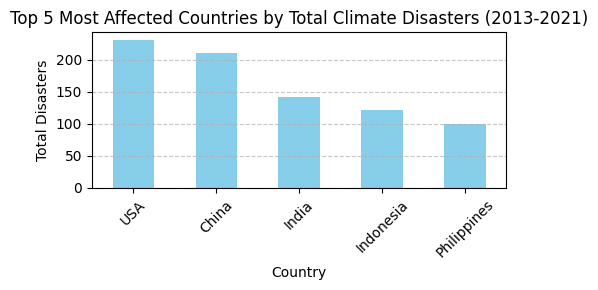

In [33]:
total_disasters_data = climate_disasters[climate_disasters['Indicator'] == 'TOTAL']

# Sum the occurrences of total disasters by country
total_disasters_per_country = total_disasters_data.groupby('Country').sum(numeric_only=True).loc[:, '2013':'2021'].sum(axis=1)

# Sort and get the top 5 countries

top_5_countries = total_disasters_per_country.sort_values(ascending=False).head(5)
print("Top 5 Most Affected Countries:")
print(top_5_countries)
plt.figure(figsize=(5, 3))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Affected Countries by Total Climate Disasters (2013-2021)')
plt.xlabel('Country')
plt.ylabel('Total Disasters')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

Top 5 Most Frequent Disaster Types

Top 5 Most Frequent Disaster Types:
           Disaster  Total
              Flood 1476.0
              Storm  967.0
          Landslide  152.0
            Drought  142.0
Extreme temperature  120.0


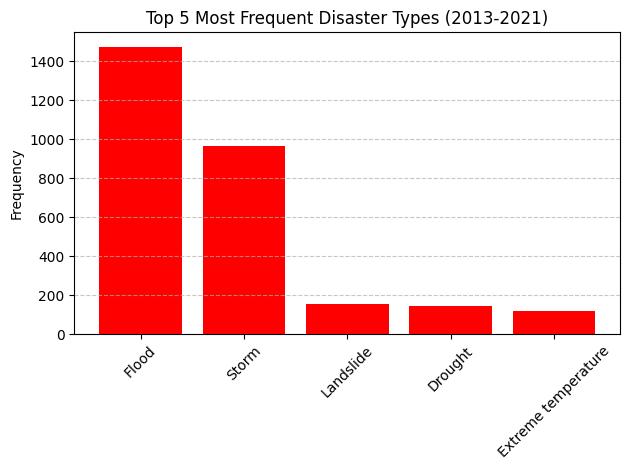

In [51]:
# Filter out 'TOTAL' indicator
total_disasters_data = climate_disasters[climate_disasters['Indicator'] != 'TOTAL']

# Sum the occurrences of each disaster type
total_disasters_per_type = total_disasters_data.groupby('Indicator').sum(numeric_only=True).loc[:, '2013':'2021'].sum(axis=1)

# Create a DataFrame with a 'years' column
top_5_disaster_types = total_disasters_per_type.sort_values(ascending=False).head(5).reset_index()
top_5_disaster_types.columns = ['Disaster', 'Total']

print("Top 5 Most Frequent Disaster Types:")

print(top_5_disaster_types.to_string(index=False))

plt.bar(top_5_disaster_types['Disaster'], top_5_disaster_types['Total'], color='red')

plt.title('Top 5 Most Frequent Disaster Types (2013-2021)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

Total Number of Disasters per Year in each country

In [24]:
total_disasters_data = climate_disasters[climate_disasters['Indicator'] != 'TOTAL']
# Calculate yearly average occurrences for each disaster type
yearly_avg_disasters = total_disasters_data.groupby('Indicator').sum(numeric_only=True).loc[:, '2013':'2021']
print("Yearly Disasters per Year:")
print(yearly_avg_disasters)

Yearly Disasters per Year:
                      2013   2014   2015   2016   2017   2018   2019   2020  \
Indicator                                                                     
Drought                9.0   20.0   27.0   14.0   12.0   17.0   15.0   12.0   
Extreme temperature   13.0   17.0   12.0   12.0   10.0   27.0   21.0    5.0   
Flood                148.0  136.0  161.0  159.0  127.0  127.0  195.0  201.0   
Landslide             11.0   15.0   20.0   13.0   25.0   12.0   25.0   19.0   
Storm                105.0   98.0  121.0   86.0  126.0   94.0   91.0  127.0   
Wildfire              10.0    4.0   13.0   10.0   15.0   10.0   14.0    9.0   

                      2021  
Indicator                   
Drought               16.0  
Extreme temperature    3.0  
Flood                222.0  
Landslide             12.0  
Storm                119.0  
Wildfire              19.0  


Year with the Most Disasters

   Year  Disasters
0  2013      296.0
1  2014      290.0
2  2015      354.0
3  2016      294.0
4  2017      315.0
5  2018      287.0
6  2019      361.0
7  2020      373.0
8  2021      391.0
Year with the Most Disasters: 2021 with 391.0 disasters


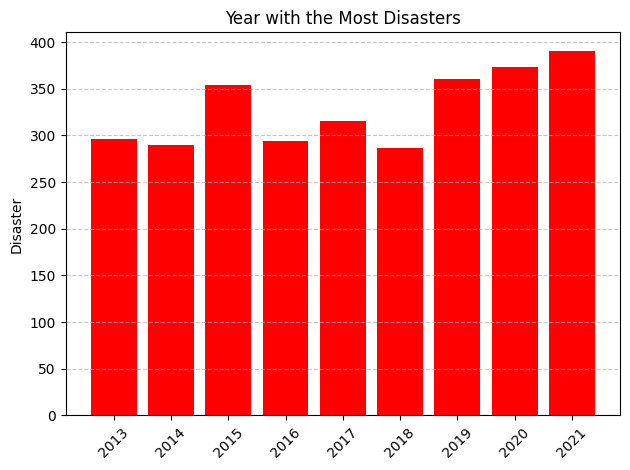

In [55]:
total_disasters_data = climate_disasters[climate_disasters['Indicator'] != 'TOTAL']
total_disasters_per_year = total_disasters_data.loc[:, '2013':'2021'].sum()

# Convert Series to DataFrame and reset index
total_disasters_per_year = total_disasters_per_year.reset_index()

# Rename columns
total_disasters_per_year.columns = ['Year', 'Disasters']

print(total_disasters_per_year)

year_with_most_disasters = total_disasters_per_year.loc[total_disasters_per_year['Disasters'].idxmax(), 'Year']
print(f"Year with the Most Disasters: {year_with_most_disasters} with {total_disasters_per_year['Disasters'].max()} disasters")

plt.bar(total_disasters_per_year['Year'], total_disasters_per_year['Disasters'], color='red')

plt.title('Year with the Most Disasters')
plt.ylabel('Disaster')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

Average Climate Disaster Per Country

In [48]:
avg_climate_disaster = climate_disasters[climate_disasters['Indicator'] == 'TOTAL']

# Melt the DataFrame to have 'Year' as a variable
avg_melted = avg_climate_disaster.melt(id_vars=['ISO3'], 
                               value_vars=['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], 
                               var_name='Year', value_name='TOTAL')


# Convert 'Year' to integer
avg_melted['Year'] = avg_melted['Year'].astype(int)

# Group by 'Country' and calculate the mean number of storms from 2013 to 2021
average_dis_per_country = avg_melted.groupby('ISO3')['TOTAL'].mean().reset_index()

# Rename the columns for clarity
average_dis_per_country.columns = ['ISO3', 'Total_Disasters']

# Print the results
print(average_dis_per_country)


    ISO3  Total_Disasters
0    AFG         5.000000
1    AGO         2.375000
2    AIA         1.000000
3    ALB         1.600000
4    ANT              NaN
..   ...              ...
210  WSM         1.000000
211  YEM         2.250000
212  ZAF         2.875000
213  ZMB         1.600000
214  ZWE         1.714286

[215 rows x 2 columns]


C:\Users\BTC\AppData\Local\Temp\ipykernel_15468\4264786015.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


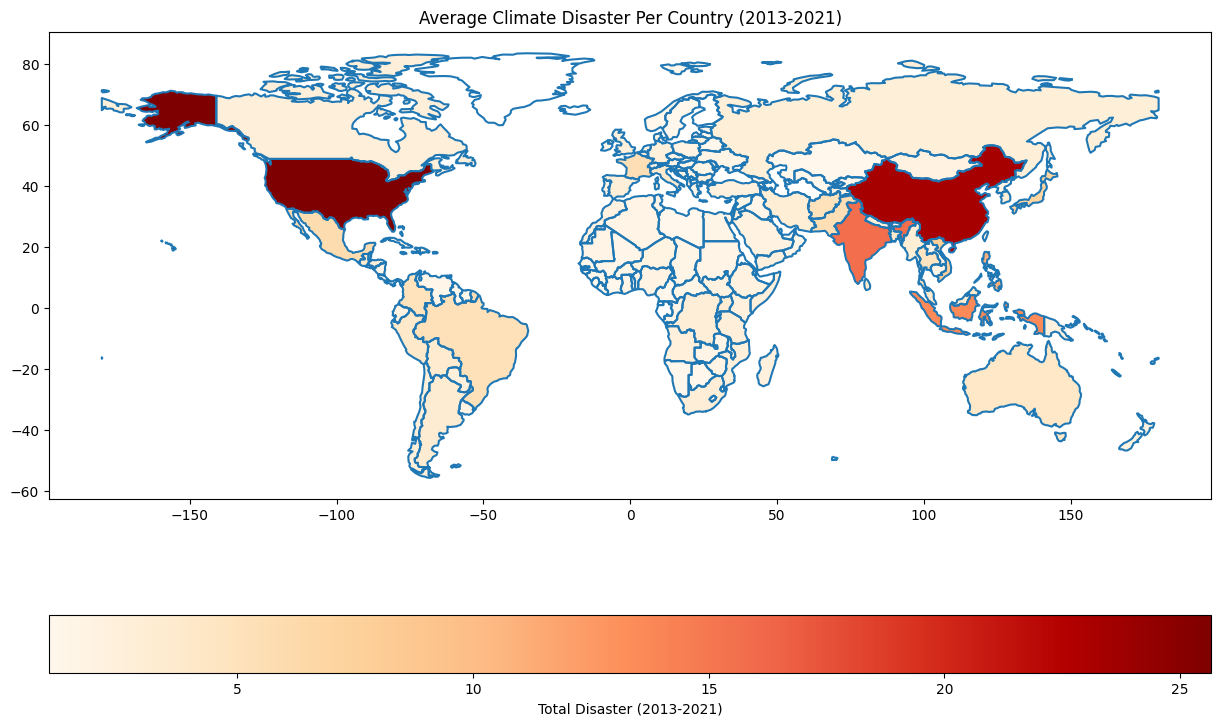

In [57]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica")]
# world = world.rename(columns={"iso_a3": "ISO3"})
world = world.merge(average_dis_per_country, how='left', left_on='iso_a3', right_on='ISO3')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.boundary.plot(ax=ax)
world.plot(column='Total_Disasters', ax=ax, legend=True,
           legend_kwds={'label': "Total Disaster (2013-2021)",
                        'orientation': "horizontal"}, cmap = 'OrRd',
        missing_kwds={"color": "white"},)
plt.title('Average Climate Disaster Per Country (2013-2021)')
plt.show()

Average Inform Risk Per Country

In [71]:
inform_risk_data = inform_risk[inform_risk['Indicator'] == 'Climate-driven INFORM Risk Indicator']

# Melt the DataFrame to have 'Year' as a variable
inform_risk_melted = inform_risk_data.melt(id_vars=['ISO3'], 
                               value_vars=['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], 
                               var_name='Year', value_name='Climate-driven INFORM Risk Indicator')

# Remove rows with missing values
# storm_melted.dropna(subset=['Storms'], inplace=True)

# Convert 'Year' to integer
inform_risk_melted['Year'] = inform_risk_melted['Year'].astype(int)

# Group by 'Country' and calculate the mean number of storms from 2013 to 2021
average_inform_risk_per_country = inform_risk_melted.groupby('ISO3')['Climate-driven INFORM Risk Indicator'].mean().reset_index()

# Rename the columns for clarity
average_inform_risk_per_country.columns = ['ISO3', 'Inform Risk']

# Print the results
print(average_inform_risk_per_country)


    ISO3  Inform Risk
0    AFG     7.188889
1    AGO     4.855556
2    ALB     3.144444
3    ARE     1.944444
4    ARG     3.033333
..   ...          ...
183  WSM     3.011111
184  YEM     5.833333
185  ZAF     4.900000
186  ZMB     5.033333
187  ZWE     6.033333

[188 rows x 2 columns]


C:\Users\BTC\AppData\Local\Temp\ipykernel_15468\2379395101.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


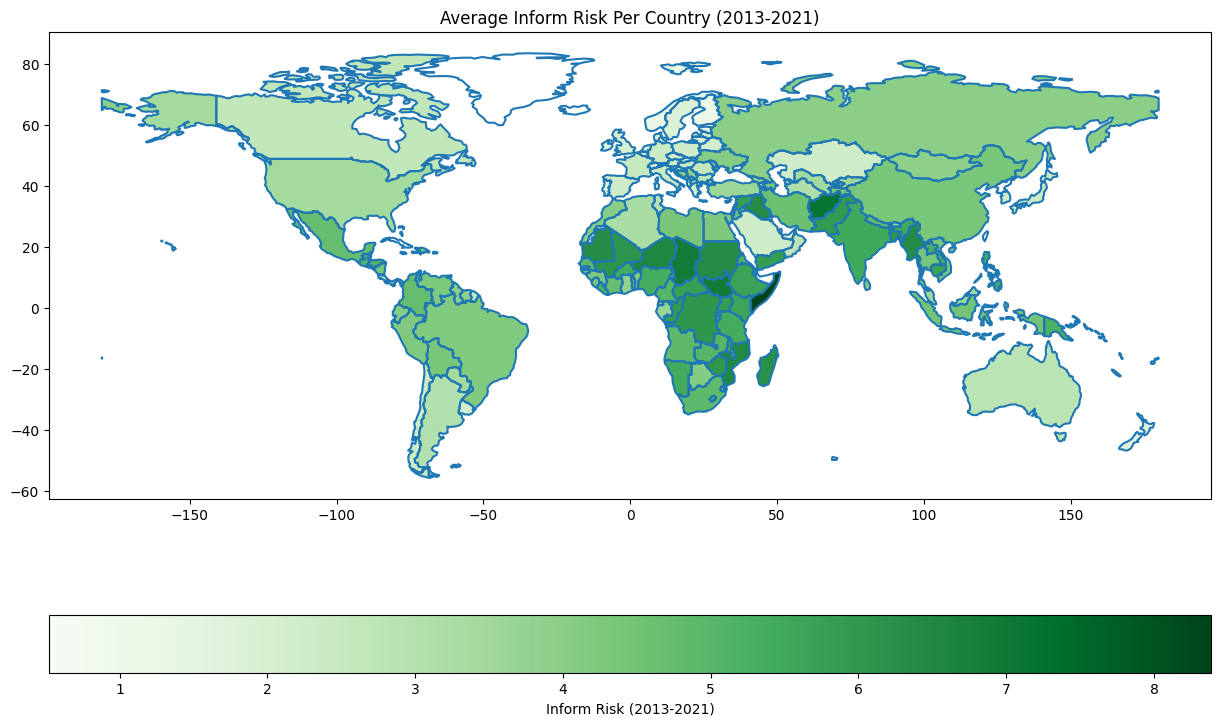

In [76]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica")]
# world = world.rename(columns={"iso_a3": "ISO3"})
world = world.merge(average_inform_risk_per_country, how='left', left_on='iso_a3', right_on='ISO3')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.boundary.plot(ax=ax)
world.plot(column='Inform Risk', ax=ax, legend=True,
           legend_kwds={'label': "Inform Risk (2013-2021)",
                        'orientation': "horizontal"}, cmap = 'Greens',
        missing_kwds={"color": "white"},)
plt.title('Average Inform Risk Per Country (2013-2021)')
plt.show()

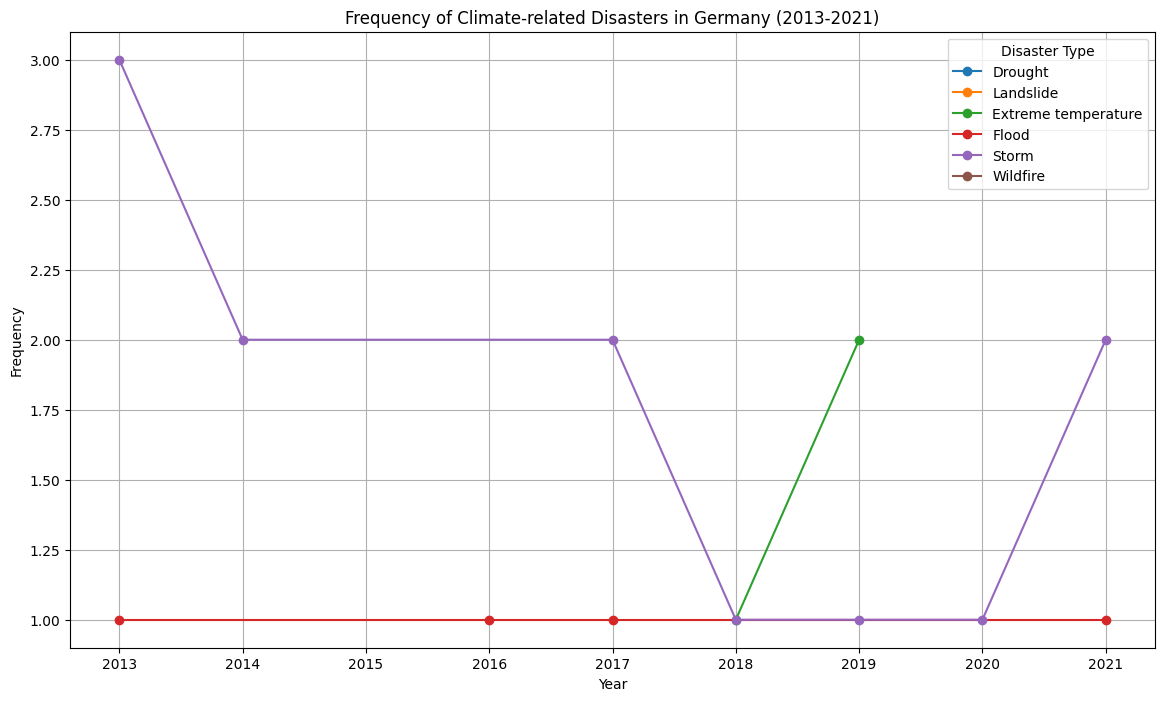

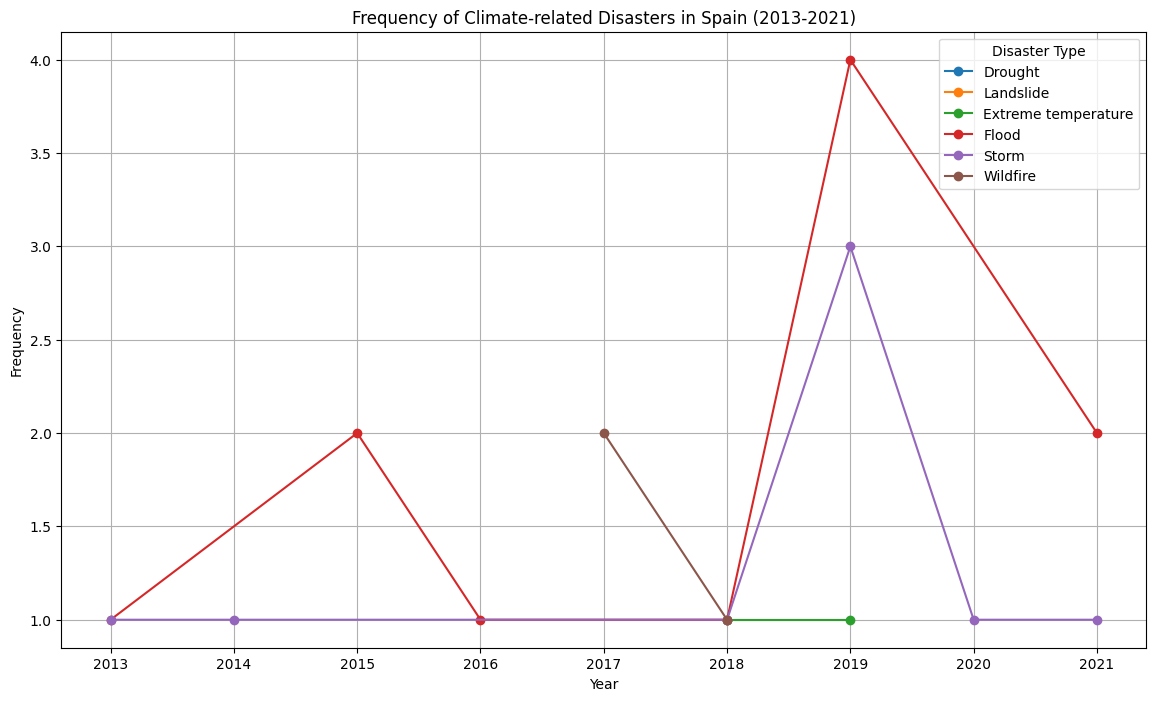

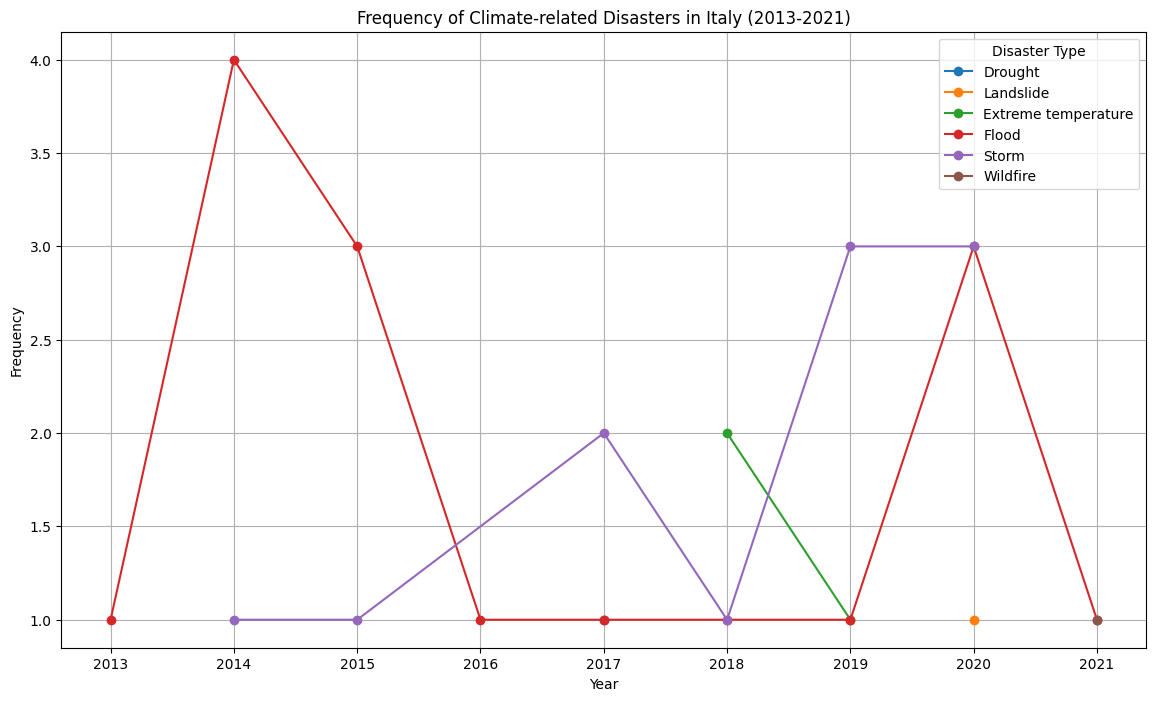

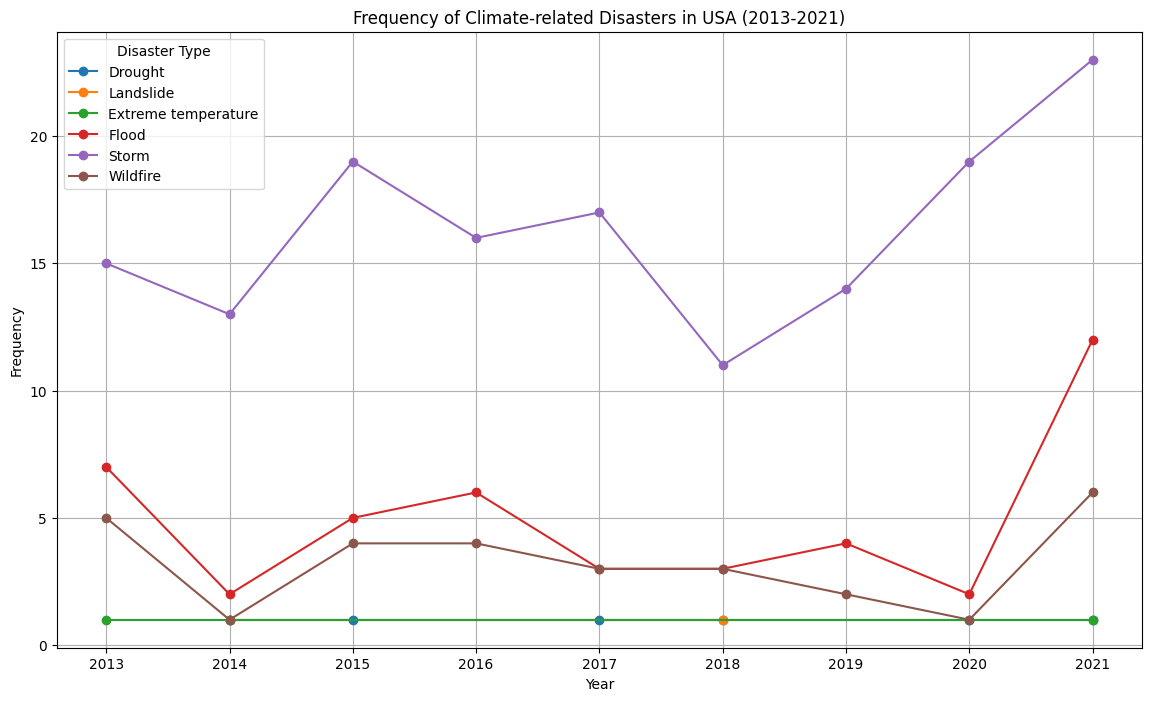

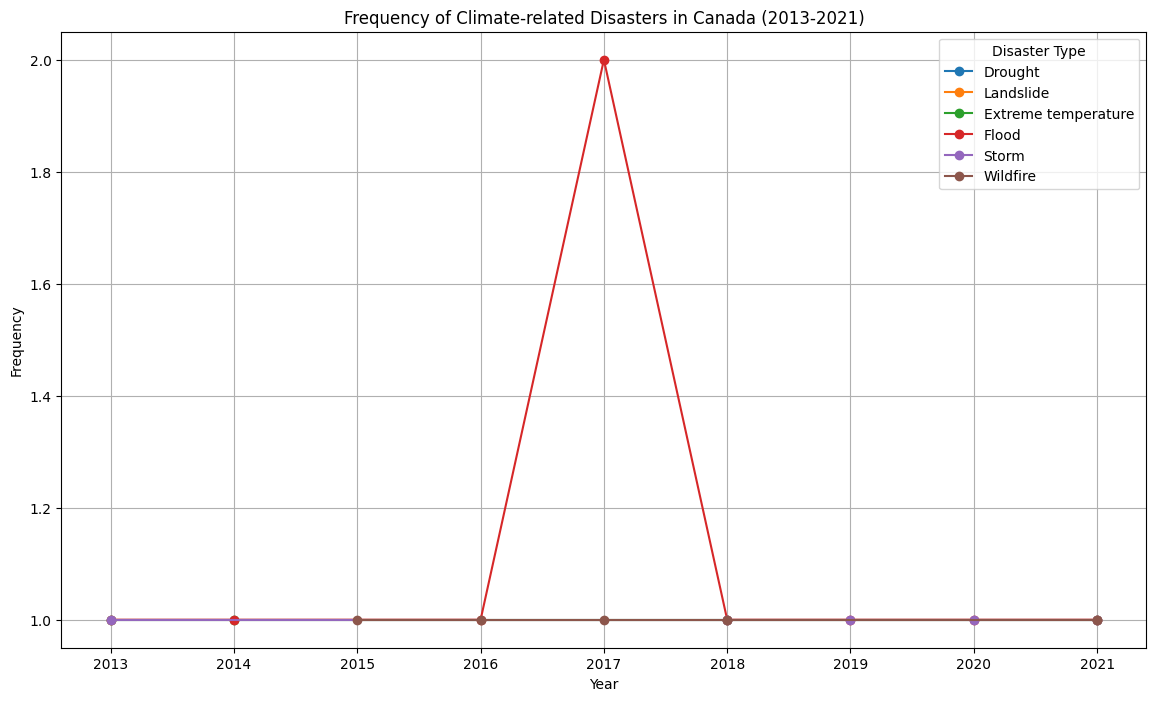

In [71]:
disaster_types = ['Drought','Landslide','Extreme temperature', 'Flood', 'Storm', 'Wildfire']
disaster_data = climate_disasters[climate_disasters['Indicator'].isin(disaster_types)]

disaster_data_melted = disaster_data.melt(
    id_vars=['Country', 'ISO3', 'Indicator'],
    value_vars=[str(year) for year in range(2013, 2022)],
    var_name='Year',
    value_name='Frequency'
)

disaster_data_melted.dropna(subset=['Frequency'], inplace=True)

# Convert 'Year' to integer
disaster_data_melted['Year'] = disaster_data_melted['Year'].astype(int)

countries = ['Germany', 'Spain', 'Italy', 'USA', 'Canada']

for country in countries:
    plt.figure(figsize=(14, 8))
    country_data = disaster_data_melted[disaster_data_melted['Country'] == country]
    for disaster in disaster_types:
        subset = country_data[country_data['Indicator'] == disaster]
        plt.plot(subset['Year'], subset['Frequency'], marker='o', label=disaster)

    plt.title(f'Frequency of Climate-related Disasters in {country} (2013-2021)')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.legend(title='Disaster Type')
    plt.grid(True)
    plt.show()

